In [2]:
# wget 명령어로 dropbox로부터 실습에 활용할 파일 다운로드
!wget -O datasets.zip 'https://www.dropbox.com/scl/fi/3xs1f9l1834zge70iqafi/datasets.zip?rlkey=nhvy0j7jlr4y43lwi809osomn&dl=0'
!wget -O notebook_images.zip 'https://www.dropbox.com/scl/fi/rfkvhgqeenv043b7ntoc0/notebook_images.zip?rlkey=ukl83j4nxemp2u19wpsvhjxpf&dl=0'

--2024-06-05 11:47:31--  https://www.dropbox.com/scl/fi/3xs1f9l1834zge70iqafi/datasets.zip?rlkey=nhvy0j7jlr4y43lwi809osomn&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce6283a5957c2a8a564cbdd5d52.dl.dropboxusercontent.com/cd/0/inline/CUSZ6_Dxq5r842wKFnR6hJOZPwr8rGtQEIlVNDFY3L2mhbvjfwQXMyt44AmZ-WUwWAXh3aK2ivqx9qqhTT_I84uH6Ejo569nkUK0Hftz0tY8nFeZUYHiIyO-CsBFwq3jTno/file# [following]
--2024-06-05 11:47:32--  https://uce6283a5957c2a8a564cbdd5d52.dl.dropboxusercontent.com/cd/0/inline/CUSZ6_Dxq5r842wKFnR6hJOZPwr8rGtQEIlVNDFY3L2mhbvjfwQXMyt44AmZ-WUwWAXh3aK2ivqx9qqhTT_I84uH6Ejo569nkUK0Hftz0tY8nFeZUYHiIyO-CsBFwq3jTno/file
Resolving uce6283a5957c2a8a564cbdd5d52.dl.dropboxusercontent.com (uce6283a5957c2a8a564cbdd5d52.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:6057:15::a27d:d0f
Connecting to uc

In [3]:
#unzip 명령어를 통해 압축 파일을 해제해 줍니다.
!unzip notebook_images.zip

Archive:  notebook_images.zip
   creating: notebook_images/
   creating: notebook_images/.ipynb_checkpoints/
  inflating: notebook_images/YOLO_flow.jpg  
  inflating: notebook_images/wandb_monitor_rec.PNG  
  inflating: notebook_images/wandb_monitor_det.PNG  
  inflating: notebook_images/Terminal.PNG  
  inflating: notebook_images/yaml_sample.PNG  
  inflating: notebook_images/OD_task.png  
  inflating: notebook_images/Wandb.PNG  
  inflating: notebook_images/OD_image.PNG  
  inflating: notebook_images/task_image.PNG  
  inflating: notebook_images/paddleocr_example.PNG  
  inflating: notebook_images/OD_flow.PNG  
  inflating: notebook_images/STR_example.PNG  
  inflating: notebook_images/iou.png  
  inflating: notebook_images/extracted_text.jpg  
  inflating: notebook_images/det_txt_sample.PNG  
  inflating: notebook_images/det_text_sample.PNG  
  inflating: notebook_images/covered_image_example.jpg  


In [4]:
# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 매우 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq datasets.zip

## Task 소개 : Scene-Text Recognition

* Scene-Text Recognition은 종이 문서에서 글자를 인식하는 일반적인 Optical Character Recognition (OCR) 기술을 넘어서, 일상의 풍경이나 장면 이미지에서도 글자를 정확하게 인식하는 기술을 의미합니다.

* 정확한 텍스트 인식을 위해서는
    - 1) 이미지 내 텍스트 영역 감지 (Detection)
    - 2) 텍스트 영역 내 텍스트 인식 (Recognition)

* 이 두 과정이 필수적으로 필요합니다. 그럼에도 불구하고, 최근에는 이 두 과정을 따로 수행했던 기존의 방식과는 달리, 두 과업을 동시에 진행하는 End-to-end 방식의 모델 연구가 주목을 받고 있습니다. 이를 Text-spotting이라고도 합니다.

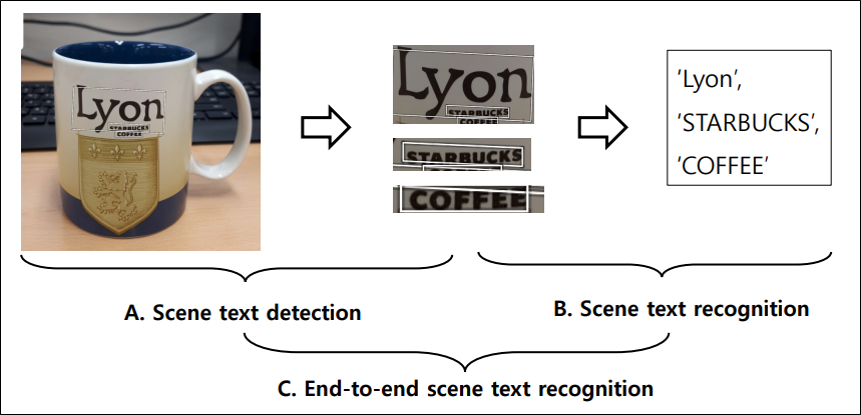

In [ ]:
from IPython.display import Image as show_image # ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('notebook_images/STR_example.PNG')

* 본 교육 자료에서는 산업현장에서의 계기판 내 숫자 텍스트를 자동으로 감지하고 인식하는 인공지능 모델을 구축하는 방법에 대해 알아봅니다.
* 본 모델은 주로 숫자 인식에 중점을 둔 설계입니다.
* 그러나 필요에 따라 한글이나 영어 같은 다양한 텍스트도 학습 데이터에 포함시키면, 해당 텍스트 인식도 가능하도록 모델을 확장할 수 있습니다.

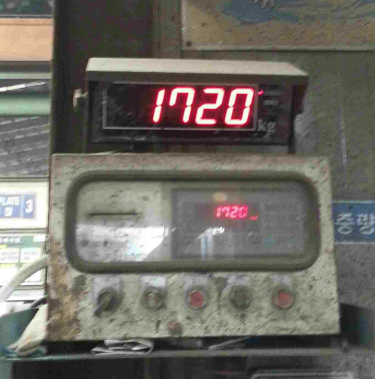

In [ ]:
show_image('notebook_images/task_image.PNG')

## Object Detection, 객체 인식 소개

* Object Detection, 객체 인식은 이미지 또는 비디오에서 개체를 식별하고 찾는 것과 관련된 컴퓨터 비전 작업입니다. 감지된 물체는 사람일 수도 있고, 건물, 동물일 수도 있습니다.


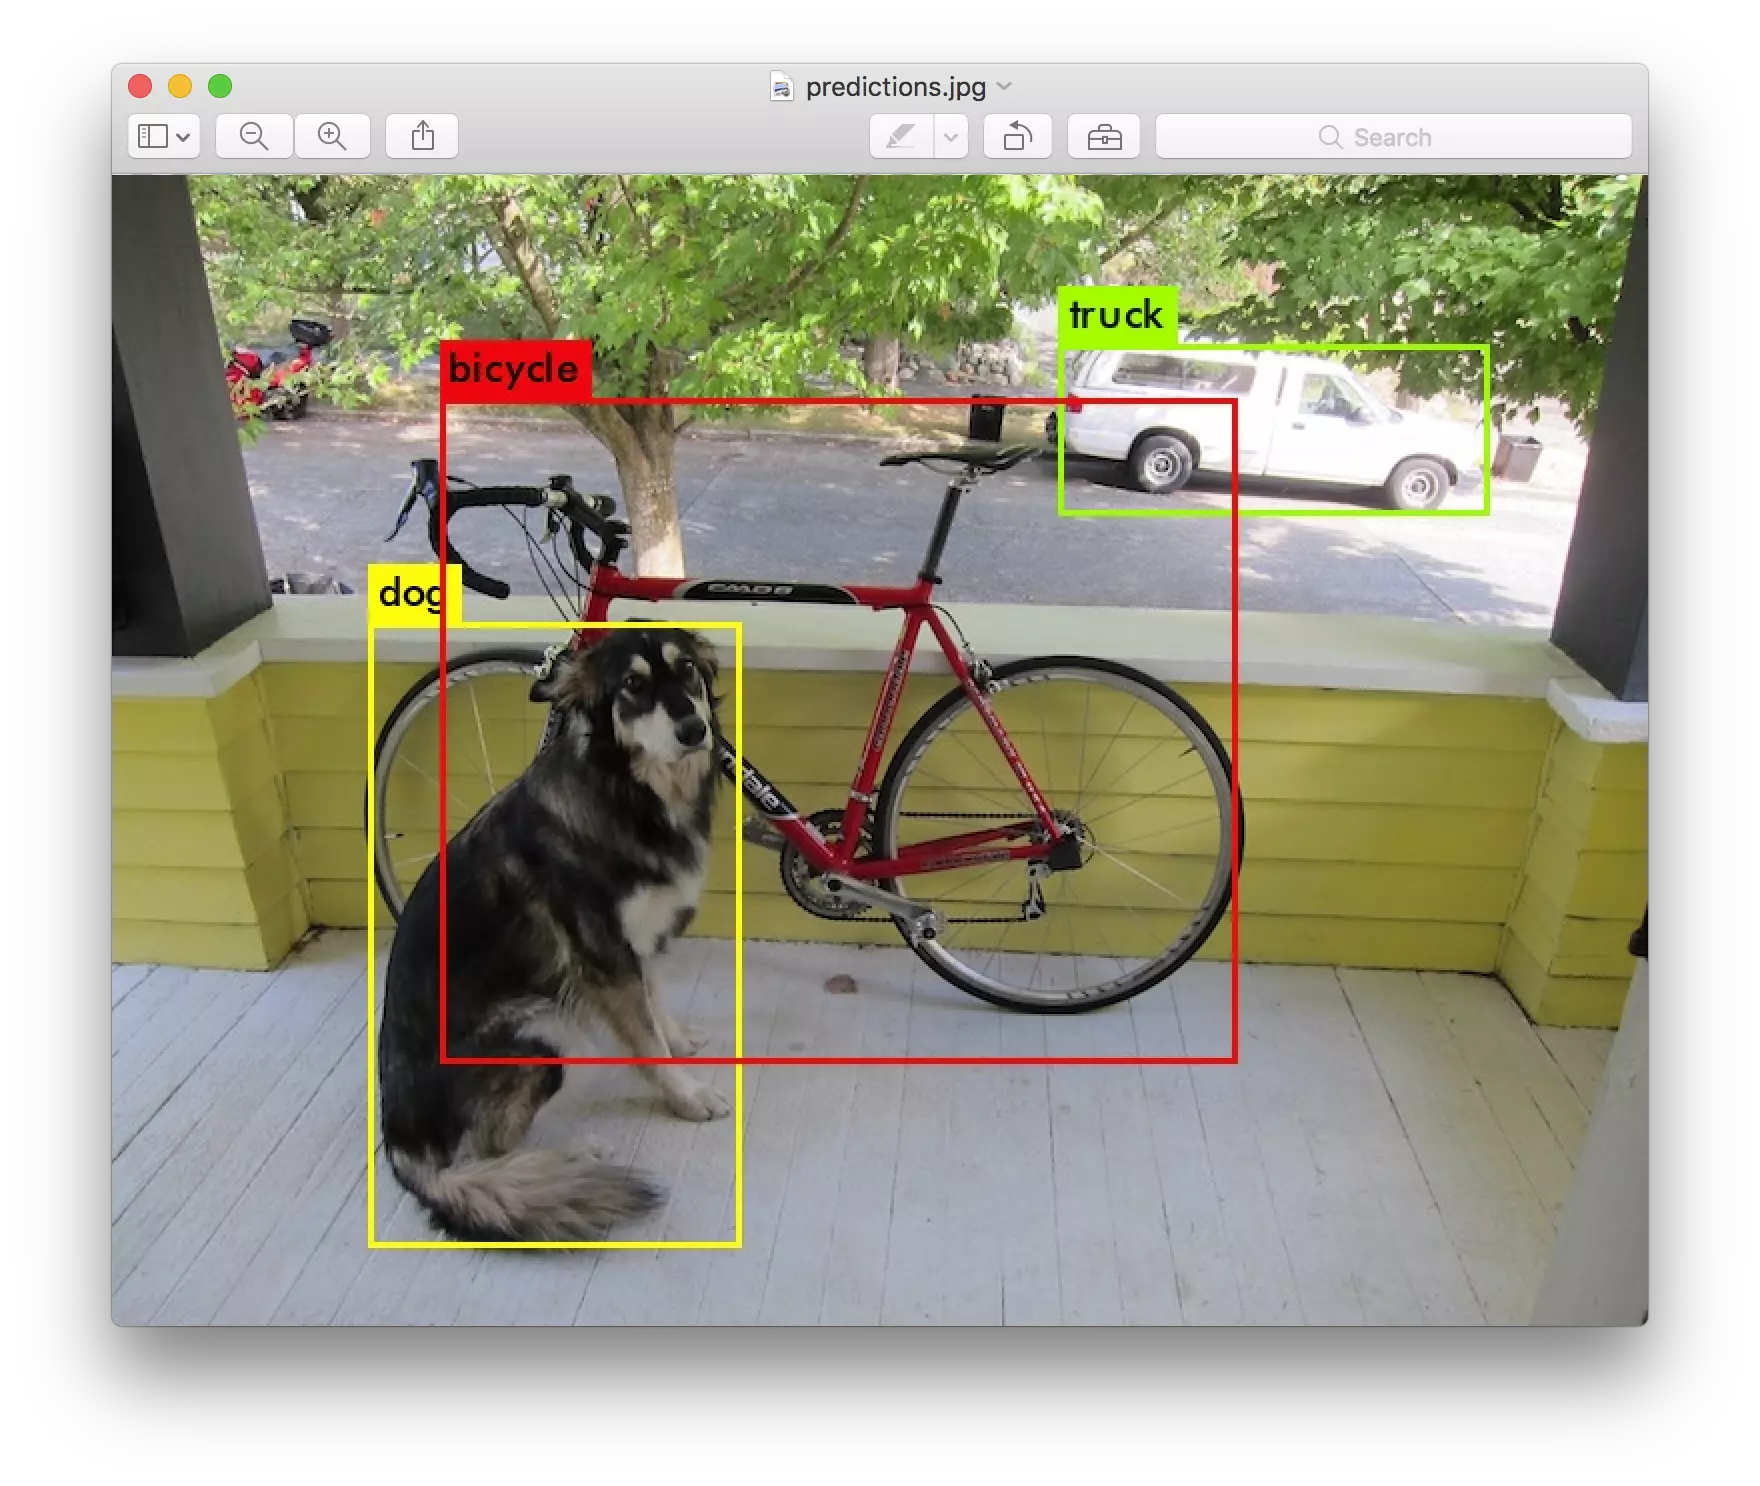

In [ ]:
show_image('notebook_images/OD_image.PNG') #출처: Joseph Redmon, YOLO: Real-Time Object Detection

* Object Detection은
    - **1) 여러 물체에 대해 어떤 물체인지 분류하는 (Classification) 문제와**
    - **2) 그 물체가 어디 있는지 Bounding box를 통해 위치정보를 나타내는 (Localization) 문제를**

* 둘 다 해내야 하는 분야를 뜻합니다.

* 쉽게 말해서 **Object Detection= 여러가지 물체에 대한 Classification + 물체의 위치정보를 파악하는 Localization** 이라고 할 수 있습니다.

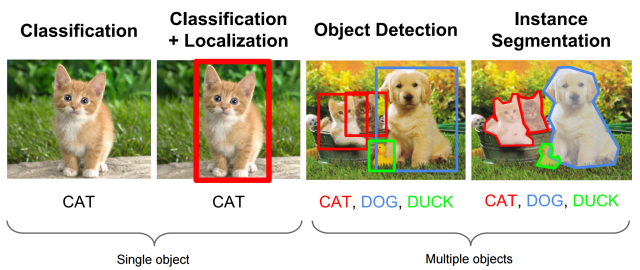

In [ ]:
show_image('notebook_images/OD_task.png')#출처: Hoya012's Research Blog

* Object Detection을 수행하기 위해서는 크게 두 가지 접근법이 존재합니다.
    - **1) 2-Stage Detector: Classification과 Localization 문제를 순차적으로 진행하는 방법**
    - **2) 1-Stage Detector: Classification과 Localization 문제를 동시에 진행하는 방법**

In [ ]:
show_image('notebook_images/OD_flow.PNG')#출처: 제이스핀, Object Detection

Output hidden; open in https://colab.research.google.com to view.

## YOLO 소개

* YOLO(You Only Look Once)는 최첨단 실시간 Object Detection 시스템입니다. 기존의 모델보다 빠르고 정확한 데이터 처리 속도를 자랑하며 화제를 몰고 왔습니다. YOLO는 물체 감지와 객체 인식에 대한 딥러닝 기반 접근 방식입니다.

* YOLO는 입력된 이미지를 일정 분할로 그리드한 다음, 신경망을 통과하여 바운딩 박스와 클래스 예측을 생성하여 최종 감지 출력을 결정합니다. 실제 이미지 및 비디오에서 테스트하기 전에 먼저 전체 데이터 세트에 대해 여러 인스턴스를 학습합니다.

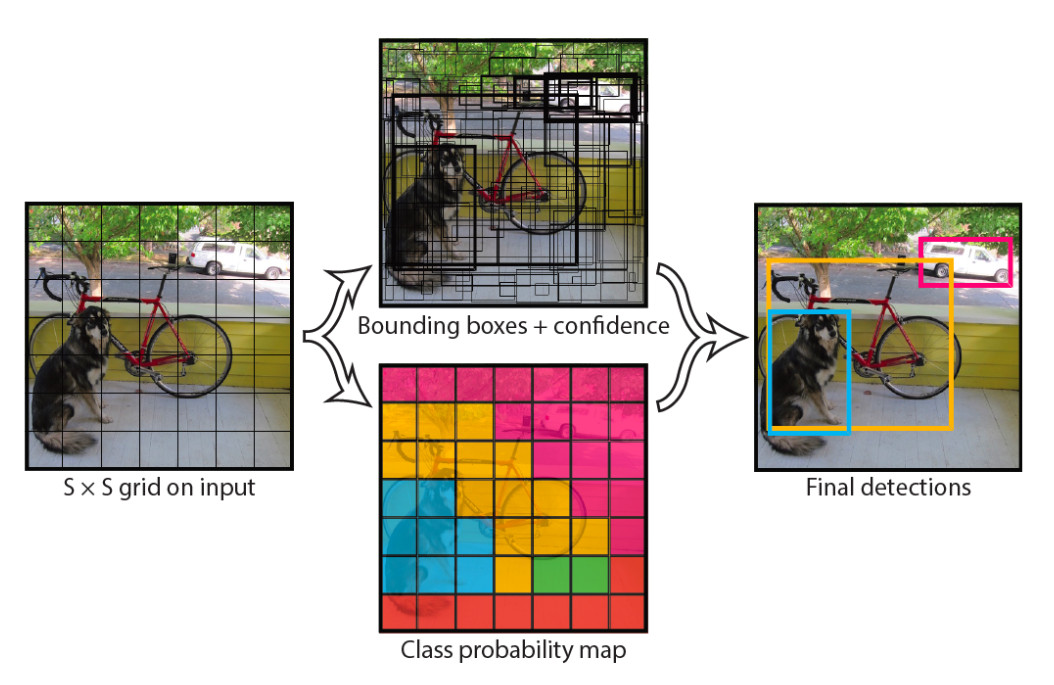

In [ ]:
show_image('notebook_images/YOLO_flow.jpg')#출처: 약초의 숲으로 놀러오세요 - 티스토리

* YOLO는 Joseph Redmon 등에 의해 처음 소개되었습니다. 2015년 Joseph Redmon의 논문에 처음 등장한 후 몇 차례 업데이트 되었으며, 이후 많은 개발자들에 의해 2023년 6월 기준 v8까지 출시되었습니다.
추가로 2024년 2월에 v9, 5월에 v10이 출시되었습니다 !!

## YOLO의 강점

* 빠른 속도: 1-Stage Detector로 물체를 실시간으로 예측하여 감지 속도 향상

* 높은 정확도: 최소한의 배경 오류로 정확한 결과를 제공

* 학습 기능: YOLO는 객체의 표현을 학습하고 이를 객체 감지에 적용할 수 있는 뛰어난 학습 기능을 갖추고 있습니다.

* 경량 모델 지원: YOLOv8은 yolov8n(nano), yolov8s(small), yolov8m(medium), yolov8l(large), yolov8x(extra large) 등 경량 모델부터 중량 모델까지 지원하여 본인의 환경에 적합한 모델을 사용할 수 있습니다.

* 확장성 : YOLOv8을 기점으로 실시간 객체 탐지(detection), 세그멘테이션(segmentation), 자세 추정(pose estimation), 분류(classification) 등 다양한 task에 활용할 수 있도록 확장되었습니다.


* [YOLOv8 공식 홈페이지](https://docs.ultralytics.com/)
            
* [YOLOv8 공식 깃허브](https://github.com/ultralytics/ultralytics)

* [YOLO에 대해 자세히 설명한 velog 글](https://ctkim.tistory.com/91)

# 1. 필요 라이브러리 설치 및 가져오기

In [ ]:
pip install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import ultralytics # YOLOv8 라이브러리와 필요한 모듈을 불러옵니다.
from matplotlib import pyplot as plt # plot images
import cv2 # opencv
import os # folder directory navigation

ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.7/107.7 GB disk)


# 2. 모델 불러오기 및 추론 실행

In [ ]:
from ultralytics import YOLO

# Load a pre-trained model
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라 라지) 등이 있음

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.4MB/s]


In [ ]:
print(type(model.names), len(model.names)) #yolov8은 MX COCO 데이터로 사전학습되어 있기 때문에, MS COCO Dataset에 정의되어
print(model.names)                         #있는 클래스 개수와 종류는 model.names를 통해서 확인할 수 있음 (총 80개, 0~79)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
project = "runs/detect"
name = "sample"

# 이미지 경로 지정 : 모델로 테스트할 이미지의 경로
img_path = 'dataset/data/images/00001.jpg'

# '00001,jpg'이미지로 사전 학습된 YOLO 모델을 이용하여 추론
# save=True로 하면 해당 프로젝트의 이름에 해당하는 경로에 테스트한 이미지 파일에 대한 예측 결과가 저장됨.
results = model.predict(source=img_path, project=project, name=name, save=True, save_txt=True)


image 1/1 /content/dataset/data/images/00001.jpg: 640x480 (no detections), 395.2ms
Speed: 26.8ms preprocess, 395.2ms inference, 22.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/sample
0 label saved to runs/detect/sample/labels


# 3. 결과 시각화

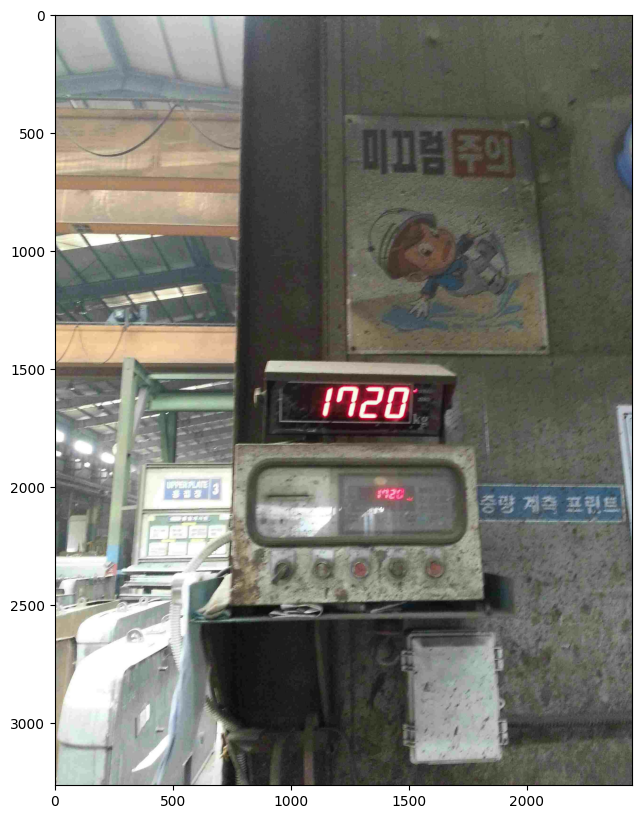

In [ ]:
# 이미지 파일을 읽어옵니다. cv2.imread 함수는 이미지 파일을 읽어와서 행렬 형태로 저장합니다.
img = cv2.imread(f"{project}/{name}/00001.jpg")

# 이미지의 색상 채널을 변경합니다. OpenCV는 기본적으로 BGR 순서로 색상을 저장하는데, 이를 RGB 순서로 변경하여 색상을 표현하도록 합니다.
# cv2.COLOR_BGR2RGB는 BGR 색상에서 RGB 색상으로 변환하는 코드로 이렇게 변환하면 이미지가 일반적으로 사용되는 RGB 색상 순서로 표현됩니다.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지를 시각화하기 위한 설정을 합니다.
plt.figure(figsize=(10,10)) # display area를 10, 10로 설정합니다.

# 탐지된 이미지를 출력합니다.
plt.imshow(img)

**모델이 MX COCO 데이터로 사전 학습되었기 때문에**


**현재로써는 디지털 숫자에 대한 탐지를 전혀 하지 못합니다. 따라서 갖고 있는 데이터를 이용하여 Fine-tuning을 수행할 필요성이 있습니다.**

**다음 장에서는 제공된 데이터를 활용하여 모델을 Fine-tuning하고, 성능 향상을 위해 데이터에 대한 EDA를 진행하겠습니다.**